# <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 25px; color: #000000; text-align: center; line-height: 0.75;background-color: #0047AB"><b>Big Data Derby 2022</b><br></h1>

<center>
    <img src="https://miro.medium.com/max/1200/1*F7HNsGnwJU6V75-DSv-CHA.jpeg" alt="Horse Racing" width="50%">
</center>

### Aim :

- To gain insights about racetracks and different races!
- To analyze horse performances as well as identify the horse as marathoner or sprinter!


### Dataset Attributes :

- This competition has provided 4 csv files with some common features :
    - **nyra_2019_complete.csv - combined table of three above files**  
    **3 common features that are found in all the csv files :**
        - **track_id** : 3 character id for the track the race took place at. 
            - **AQU : Aqueduct**
            - **BEL : Belmont**
            - **SAR : Saratoga**
        - **race_date** : date the race took place. YYYY-MM-DD.
        - **race_number** : Number of the race. Passed as 3 characters but can be cast or converted to int for this data set.
    
    - **nyra_start_table.csv - horse/jockey race data** 
        - **program_number** : Program number of the horse in the race passed as 3 characters. Should remain 3 characters as it isn't limited to just numbers. Is essentially the unique identifier of the horse in the race.
        - **weight_carried** : An integer of the weight carried by the horse in the race.
        - **jockey** : Name of the jockey on the horse in the race. 50 character max.
        - **odds** : Odds to win the race passed as an integer. Divide by 100 to derive the odds to 1. 
            - **Example - 1280 would be 12.8-1**
        - **position_at_finish** : An integer of the horse's finishing position
            
    - **nyra_race_table.csv - racetrack race data** 
        - **distance_id** : Distance of the race in furlongs passed as an integer. 
            - **Example - 600 would be 6 furlongs**
        - **course_type** : The course the race was run over passed as one character. 
            - **M : Hurdle**
            - **D : Dirt**
            - **O - Outer turf** 
            - **I - Inner turf** 
            - **T - turf**
        - **track_condition** : The condition of the course the race was run on passed as three characters. 
            - **YL : Yielding**
            - **FM : Firm** 
            - **SY : Sloppy** 
            - **GD : Good** 
            - **FT : Fast** 
            - **MY : Muddy** 
            - **SF : Soft**
        - **run_up_distance** : Distance in feet of the gate to the start of the race passed as an integer.
        - **race_type** : The classification of the race passed as as five characters. 
            - **STK : Stakes** 
            - **WCL : Waiver Claiming** 
            - **WMC : Waiver Maiden Claiming** 
            - **SST : Starter Stakes** 
            - **SHP : Starter Handicap** 
            - **CLM : Claiming** 
            - **STR : Starter Allowance** 
            - **AOC : Allowance Optionl Claimer** 
            - **SOC : Starter Optional Claimer** 
            - **MCL : Maiden Claiming** 
            - **ALW : Allowance** 
            - **MSW : Maiden Special Weight**
        - **purse** : Purse in US dollars of the race passed as an money with two decimal places.
        - **post_time** : Time of day the race began passed as 5 character. 
            - **Example - 01220 would be 12:20**    

    - **nyra_tracking_table.csv - tracking data** 
        - **program_number** : Program number of the horse in the race passed as 3 characters. Should remain 3 characters as it isn't limited to just numbers. Is essentially the unique identifier of the horse in the race.
        - **trakus_index** : The common collection of point of the lat / long of the horse in the race passed as an integer. From what we can tell, it's collected every 0.25 seconds.
        - **latitude** : The latitude of the horse in the race passed as a float.
        - **longitude** : The longitude of the horse in the race passed as a float.

### What you will learn :
- Data Preprocessing
- Data Visualization

### Lets get started!

# <center><div style="font-family: Trebuchet MS; background-color: #0047AB; color: #000000; padding: 12px; line-height: 1;">Dataset Preprocessing</div></center>

### Import the Necessary Libraries :

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
from tqdm import tqdm
import re
import pickle
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

### Accessing CSV Files :

In [2]:
complete_table = pd.read_csv('../input/big-data-derby-2022/nyra_2019_complete.csv') # Combined table of three above files

d = pd.DataFrame(columns = range(len(list(complete_table.columns))))
d.loc[0] = list(complete_table.columns)

complete_table.columns = ['track_id','race_date','race_number','program_number','trakus_index','latitude','longitude','distance_id',
               'course_type','track_condition','run_up_distance','race_type','purse','post_time','weight_carried',
               'jockey','odds','position_at_finish']
d.columns = ['track_id','race_date','race_number','program_number','trakus_index','latitude','longitude','distance_id',
             'course_type','track_condition','run_up_distance','race_type','purse','post_time','weight_carried',
             'jockey','odds','position_at_finish']

complete_table = pd.concat([d,complete_table])

start_table = pd.read_csv('../input/big-data-derby-2022/nyra_start_table.csv') # Horse / jockey race data
start_table.columns = ['track_id','race_date','race_number','program_number','weight_carried','jockey','odds','position_at_finish']


race_table = pd.read_csv('../input/big-data-derby-2022/nyra_race_table.csv') # Racetrack race data

tracking_table = pd.read_csv('../input/big-data-derby-2022/nyra_tracking_table.csv') # Tracking data

In [3]:
complete_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5228430 entries, 0 to 5228428
Data columns (total 18 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   track_id            object
 1   race_date           object
 2   race_number         object
 3   program_number      object
 4   trakus_index        object
 5   latitude            object
 6   longitude           object
 7   distance_id         object
 8   course_type         object
 9   track_condition     object
 10  run_up_distance     object
 11  race_type           object
 12  purse               object
 13  post_time           object
 14  weight_carried      object
 15  jockey              object
 16  odds                object
 17  position_at_finish  object
dtypes: object(18)
memory usage: 757.9+ MB


- Size of this combined file as well as of the other files can be an issue! Hence we reduce the file size by converting the datatypes of the features from object to their respective datatypes! 

### Dataset Size Reduction :

#### Complete CSV File :

- For **numerical features**, we check the **number of unique values, the highest and the lowest value present in the feature!**
- From this information, we decide to convert the datatypes of the features to **int8**, **int16** and **float16**!
- Features stored stored in **object** datatype occupy the highest memory space!
- We also convert the **race_date** feature into **datetime** datatype! 

In [4]:
# Numerical Column Transformations :

complete_table['race_number'] = complete_table['race_number'].astype('int8') # 1 - race_number

r1 = re.compile('\d+'); is_string = lambda x : type(x) == str  
l1 = [i.split()[0] if type(i) == str else i for i in tqdm(list(complete_table['program_number']))] ; l2 = []
for i in tqdm(l1):
    if is_string(i) == True:
        try:
            if int(r1.findall(i)[0]) == int(i):
                l2.append(int(r1.findall(i)[0]))
        except ValueError:
            l2.append(i)
    else :
        l2.append(i)
complete_table['program_number'] = l2 # 2 - program_nuber

complete_table['trakus_index'] = complete_table['trakus_index'].astype('int16') # 3 - trakus_index
complete_table['latitude'] = complete_table['latitude'].astype('float16') # 4 - latitude
complete_table['longitude'] = complete_table['longitude'].astype('float16') # 5 - longitude 
complete_table['distance_id'] = complete_table['distance_id'].astype('int16') # 6 - distance_id
complete_table['run_up_distance'] = complete_table['run_up_distance'].astype('int16') # 7 - run_up_distance
complete_table['purse'] = complete_table['purse'].astype(float); complete_table['purse'] = complete_table['purse'].astype('int32') # 8 - purse
complete_table['weight_carried'] = complete_table['weight_carried'].astype('int8') # 9 - weight_carried
complete_table['odds'] = complete_table['odds'].astype('int16') # 10 - odds
complete_table['position_at_finish'] = complete_table['position_at_finish'].astype('int8') # 11 - position_at_finish 

# DateTime Features
complete_table['post_time'] = complete_table['post_time'].astype(str) # 12 - post_time
l1 = list(complete_table['post_time']);
l2 = list(complete_table['race_date']) # year - month - day

l = []
for i,j in tqdm(zip(l1,l2)):
    if len(i) == 3:
        l.append(i[:1] + ':' + i[1:] + ' ' + j)
    elif len(i) == 4:
        l.append(i[:2] + ':' + i[2:] + ' ' + j)
    elif len(i) == 5:
        l.append(i[1:3] + ':' + i[3:] + ' ' + j) 
l = pd.to_datetime(pd.Series(l),format = '%H:%M %Y-%m-%d')
complete_table['post_time'] = l

date_dict = dict(zip(pd.date_range("2019-01-01", "2019-12-31").strftime("%Y-%m-%d"),
                     pd.date_range("2019-01-01", "2019-12-31")))

complete_table['race_date'] = complete_table.race_date.map(date_dict) # 13 - race_date

100%|██████████| 5228430/5228430 [00:08<00:00, 634439.10it/s]
5228430it [00:05, 1003683.89it/s]


- For **text data features**, we check the **number of unique values** and **Label Encode** these values!
- In this way, we convert the text data into numerical data!

In [5]:
le = LabelEncoder()
text_data_features = ['track_id', 'course_type', 'track_condition', 'race_type', 'jockey']
l3 = []; l4 = [];
print('Label Encoder Transformation')
for i in tqdm(text_data_features):
    complete_table[i] = le.fit_transform(complete_table[i])
    l3.append(list(complete_table[i].unique())); l4.append(list(le.inverse_transform(complete_table[i].unique())))
    print(i,' : ',complete_table[i].unique(),' = ',le.inverse_transform(complete_table[i].unique()))

Label Encoder Transformation


 20%|██        | 1/5 [00:01<00:05,  1.37s/it]

track_id  :  [0 1 2]  =  ['AQU' 'BEL' 'SAR']


 40%|████      | 2/5 [00:02<00:04,  1.37s/it]

course_type  :  [0 3 1 4 2]  =  ['D' 'O' 'I' 'T' 'M']


 60%|██████    | 3/5 [00:04<00:02,  1.38s/it]

track_condition  :  [2 0 1 5 3 6 4]  =  ['GD ' 'FM ' 'FT ' 'SY ' 'MY ' 'YL ' 'SF ']


 80%|████████  | 4/5 [00:05<00:01,  1.39s/it]

race_type  :  [ 2  1  0  7  8 10  9  6  5  3 11  4]  =  ['CLM' 'AOC' 'ALW' 'SST' 'STK' 'WCL' 'STR' 'SOC' 'SHP' 'MCL' 'WMC' 'MSW']


100%|██████████| 5/5 [00:06<00:00,  1.39s/it]

jockey  :  [  5 119  42  66 149  65  79 139 140  95 154 103  60  68 170  18  64  50
 134  85  77  21 124 138 117  89  96 115 148  37 106 146  49  34 141 150
 125 102 105  63 118  76  82 145  39  71 167  75 176  92  26 177  78 136
  57 110 101  23  87 133 153 107 171  81  48  67 127  51  22  29  30  41
  88 175 126 159 132  27  45  53 108  94 104 100 135  73  52  19  93 109
  43 112  46 168  69  59  84 164 166 142   1 157  16  32 120  80  24  83
  56  11  54 143 121 165 111 160  13 174   4  98  90  62 116  58 129 162
  36  74   7  25  47   0  15 155 152   8 113  31 169   9   2 122 131  40
  35  55 173  97  70  72   3 144  86  14 151 130  91  20  10  33 128  12
 172 114  61  44  38  28 123 137 158 161  17  99   6 156 147 163]  =  ['Andre Shivnarine Worrie' 'Manuel Franco' 'Dylan Davis' 'Irad Ortiz Jr.'
 'Samuel Jimenez' 'Heman K. Harkie' 'Joey R. Martinez' 'Rajiv Maragh'
 'Reylu Gutierrez' 'Jose L. Ortiz' 'Silvestre Gonzalez' 'Junior Alvarado'
 'Gerard Galligan' 'Jack Doyle' 'Victor R. C

- We store the label encoded transformations inside a dictionary that gives us the information about the encoded value and it's original value! 

In [6]:
tf1 = {}
for i in range(len(text_data_features)):
    tf1[text_data_features[i]] = {}
    for j,k in zip(l3[i],l4[i]):
        tf1[text_data_features[i]][j] = k

In [7]:
complete_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5228430 entries, 0 to 5228428
Data columns (total 18 columns):
 #   Column              Dtype         
---  ------              -----         
 0   track_id            int64         
 1   race_date           datetime64[ns]
 2   race_number         int8          
 3   program_number      object        
 4   trakus_index        int16         
 5   latitude            float16       
 6   longitude           float16       
 7   distance_id         int16         
 8   course_type         int64         
 9   track_condition     int64         
 10  run_up_distance     int16         
 11  race_type           int64         
 12  purse               int32         
 13  post_time           datetime64[ns]
 14  weight_carried      int8          
 15  jockey              int64         
 16  odds                int16         
 17  position_at_finish  int8          
dtypes: datetime64[ns](2), float16(2), int16(4), int32(1), int64(5), int8(3), object(1)

In [8]:
complete_table.to_pickle('complete_table' + '.pkl',compression = 'gzip' )
with open('tf1.pkl','wb') as f:
    pickle.dump(tf1,f)

- We can clearly see the size of the files have been reduced from **757.9 MB** to **453.7 MB**!
- Now, we know that these transformations are only retained for the active session and cannot be used afterwards!
- Hence, we store these transformations along with this modified dataset into pickle files!
- These pickle files will hold these modifications and we do not need to execute those transformations everytime!

**We now repeat this same process for the race_table and the start_table files! We will not use it for tracking_table file as it can be easily separated from the combined_file!**

#### Race Table

In [9]:
# Numerical Column Transformations :

race_table['race_number'] = race_table['race_number'].astype('int8') # 1 - race_number
race_table['distance_id'] = race_table['distance_id'].astype('int16') # 2 - distance_id
race_table['run_up_distance'] = race_table['run_up_distance'].astype('int16') # 3 - run_up_distance
race_table['purse'] = race_table['purse'].astype(float); race_table['purse'] = race_table['purse'].astype('int32') # 8 - purse

# DateTime Features
race_table['post_time'] = race_table['post_time'].astype(str) # 12 - post_time
l1 = list(race_table['post_time']);
l2 = list(race_table['race_date']) # year - month - day

l = []
for i,j in tqdm(zip(l1,l2)):
    if len(i) == 3:
        l.append(i[:1] + ':' + i[1:] + ' ' + j)
    elif len(i) == 4:
        l.append(i[:2] + ':' + i[2:] + ' ' + j)
    elif len(i) == 5:
        l.append(i[1:3] + ':' + i[3:] + ' ' + j) 
l = pd.to_datetime(pd.Series(l),format = '%H:%M %Y-%m-%d')
race_table['post_time'] = l

date_dict = dict(zip(pd.date_range("2019-01-01", "2019-12-31").strftime("%Y-%m-%d"),
                     pd.date_range("2019-01-01", "2019-12-31")))

race_table['race_date'] = race_table.race_date.map(date_dict) # 13 - race_date

2000it [00:00, 847163.00it/s]


In [10]:
le = LabelEncoder()
text_data_features = ['track_id', 'course_type', 'track_condition', 'race_type']
l3 = []; l4 = [];
print('Label Encoder Transformation')
for i in tqdm(text_data_features):
    race_table[i] = le.fit_transform(race_table[i])
    l3.append(list(race_table[i].unique())); l4.append(list(le.inverse_transform(race_table[i].unique())))
    print(i,' : ',race_table[i].unique(),' = ',le.inverse_transform(race_table[i].unique()))

Label Encoder Transformation


100%|██████████| 4/4 [00:00<00:00, 473.52it/s]

track_id  :  [0 1 2]  =  ['AQU' 'BEL' 'SAR']
course_type  :  [0 3 4 1 2]  =  ['D' 'O' 'T' 'I' 'M']
track_condition  :  [3 2 1 5 0 6 4]  =  ['MY ' 'GD ' 'FT ' 'SY ' 'FM ' 'YL ' 'SF ']
race_type  :  [ 1  3  0  8  2  4  9  6  5 10  7 11]  =  ['AOC' 'MCL' 'ALW' 'STK' 'CLM' 'MSW' 'STR' 'SOC' 'SHP' 'WCL' 'SST' 'WMC']


In [11]:
tf2 = {}
for i in range(len(text_data_features)):
    tf2[text_data_features[i]] = {}
    for j,k in zip(l3[i],l4[i]):
        tf2[text_data_features[i]][j] = k

In [12]:
race_table.to_pickle('race_table' + '.pkl',compression = 'gzip' )
with open('tf2.pkl','wb') as f:
    pickle.dump(tf2,f)

#### Start Table :

In [13]:
# Numerical Column Transformations :

start_table['race_number'] = start_table['race_number'].astype('int8') # 1 - race_number

r1 = re.compile('\d+'); is_string = lambda x : type(x) == str  
l1 = [i.split()[0] if type(i) == str else i for i in tqdm(list(start_table['program_number']))] ; l2 = []
for i in tqdm(l1):
    if is_string(i) == True:
        try:
            if int(r1.findall(i)[0]) == int(i):
                l2.append(int(r1.findall(i)[0]))
        except ValueError:
            l2.append(i)
    else :
        l2.append(i)
start_table['program_number'] = l2 # 2 - program_nuber
start_table['weight_carried'] = start_table['weight_carried'].astype('int8') # 3 - weight_carried
start_table['odds'] = start_table['odds'].astype('int16') # 4 - odds
start_table['position_at_finish'] = start_table['position_at_finish'].astype('int8') # 5 - position_at_finish 

# DateTime Features
date_dict = dict(zip(pd.date_range("2019-01-01", "2019-12-31").strftime("%Y-%m-%d"),
                     pd.date_range("2019-01-01", "2019-12-31")))

start_table['race_date'] = start_table.race_date.map(date_dict) # 6 - race_date

100%|██████████| 14914/14914 [00:00<00:00, 430328.56it/s]


In [14]:
le = LabelEncoder()
text_data_features = ['track_id', 'jockey']
l3 = []; l4 = [];
print('Label Encoder Transformation')
for i in tqdm(text_data_features):
    start_table[i] = le.fit_transform(start_table[i])
    l3.append(list(start_table[i].unique())); l4.append(list(le.inverse_transform(start_table[i].unique())))
    print(i,' : ',start_table[i].unique(),' = ',le.inverse_transform(start_table[i].unique()))

Label Encoder Transformation


100%|██████████| 2/2 [00:00<00:00, 137.57it/s]

track_id  :  [0 1 2]  =  ['AQU' 'BEL' 'SAR']
jockey  :  [103  96  83 119  18  42   5 140  50 139 117  82  56  85  63  78  79 102
 124  64 135  29  65  87  34  43  39 149 138 153  45 107  25  46 115 159
  21 146  32 148 168  58  35 134 154  67 177 166   0 100  13 129  62 142
 110 106  11  71   3 127   4  72   2 131 174  31  49 170 104  51  75  66
  76  95 133 169  57  59  36 144   9 118  41 162 105 164  88  77   8  52
  22  27 172 171  55  92 157  44  40  80 112  81 167 176 116  97  33 143
  84   1 123  54 173 165 141  30  53 152  12 120  17  99 151 101 113  28
  24  47   7 130 126 128 158  98  70 156 163 160  61  60 109  68 150 125
 175 145 137  19 161  89  10  23  93  74 132 111  94  26  37  38 108  16
 147  86  48 136  73  15 121  69  14   6 114  90  91 155 122  20]  =  ['Junior Alvarado' 'Jose Lezcano' 'Jomar Garcia' 'Manuel Franco'
 'Benjamin Hernandez' 'Dylan Davis' 'Andre Shivnarine Worrie'
 'Reylu Gutierrez' 'Eric Cancel' 'Rajiv Maragh' 'Luis R. Reyes'
 'John R. Velazquez' 'Fran

In [15]:
tf3 = {}
for i in range(len(text_data_features)):
    tf3[text_data_features[i]] = {}
    for j,k in zip(l3[i],l4[i]):
        tf3[text_data_features[i]][j] = k

In [16]:
start_table.to_pickle('start_table' + '.pkl',compression = 'gzip' )
with open('tf3.pkl','wb') as f:
    pickle.dump(tf3,f)

- We will load the pickle files and check these files!

In [17]:
df1 = pd.read_pickle('./complete_table.pkl',compression = 'gzip')
df2 = pd.read_pickle('./race_table.pkl',compression = 'gzip')
df3 = pd.read_pickle('./start_table.pkl',compression = 'gzip')

with open('./tf1.pkl', 'rb') as file:  
    tf1 = pickle.load(file)
with open('./tf2.pkl', 'rb') as file:  
    tf2 = pickle.load(file)    
with open('./tf3.pkl', 'rb') as file:  
    tf3 = pickle.load(file)
    
colors = ['#0047AB','000000']

**We are now all set to use the datasets!**

# <center><div style="font-family: Trebuchet MS; background-color: #0047AB; color: #000000; padding: 12px; line-height: 1;">Analysis of RaceTracks</div></center>

- **We aim to gain insights about the racetrack and it's different characteristics!**

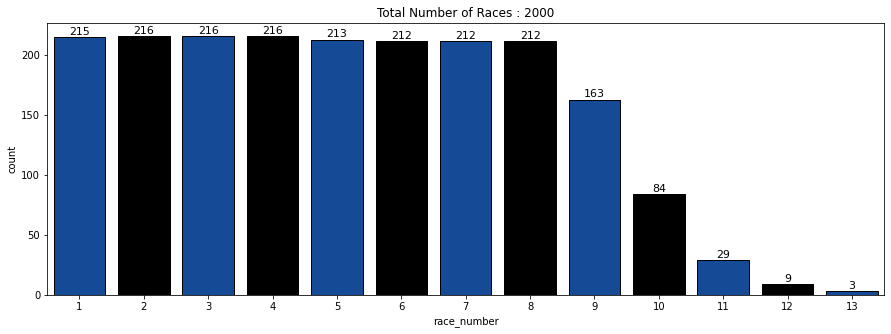

In [18]:
plt.figure(figsize = (15,5))
ax = sns.countplot('race_number',data = df2,palette = colors, edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = 'Total Number of Races : ' + str(sum(df2['race_number'].value_counts()))
plt.title(title);

- Competition organizers have shared the data of **2000** races.
- These races have been labeled with integer values from **1 - 13**.
- The number of races drops from the cliff value of **212** of **race_number 8** to **3** of **race_number 13**.
- We need to dig more to get information about the differences in these **race_number** values but first we need to check where these races are conducted!

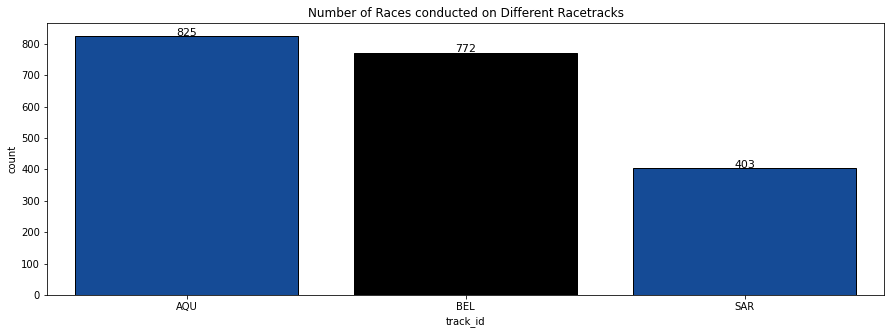

In [19]:
plt.figure(figsize = (15,5))
ax = sns.countplot('track_id',data = df2,palette = colors, edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(tf2['track_id'].values())
title = 'Number of Races conducted on Different Racetracks'
plt.title(title);

- The data collected is from the 3 racetracks used for horse racing :
    - **AQU(Aqueduct)**
    - **BEL(Belmont)**
    - **SAR(Saratoga)**
- We can see that **AQU(Aqueduct)** conducted the highest number of races, **825**, followed by **BEL(Belmont)** with **772** races. **SAR(Saratoga)** comes at the last position with **403** races.
- We will now check during which months the above tracks were utilised for horse racing!

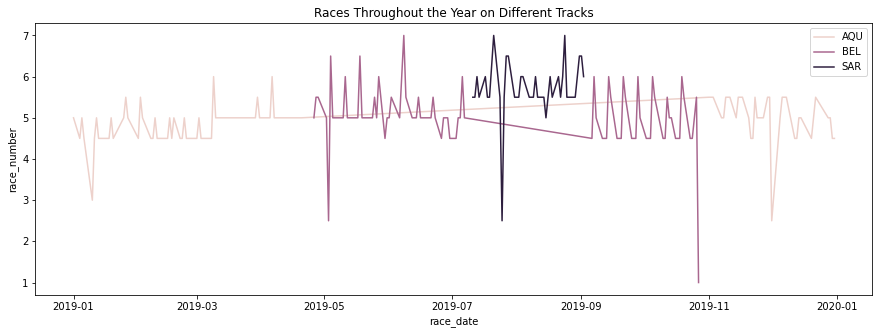

In [20]:
plt.figure(figsize = (15,5))
sns.lineplot(x = 'race_date', y = 'race_number',data = df2, hue = 'track_id',ci = None)
plt.legend(tf2['track_id'].values())
plt.title('Races Throughout the Year on Different Tracks');

- We can say that the season of horse racing probably begins at the **end of October - start of Novemeber** because of the huge spike present that touches the **race_number 1** on the y-axis.
- **AQU(Aqueduct)** hosts races from months of **October / November - April**. It is then followed by a **2 month** period of  races conducted at the **BEL(Belmont)** race that gets interrupted by the races conducted at **SAR(Saratoga)** racetrack.
- Races at **BEL(Belmont)** resume again in the month of **September till the end of October - start of Novemeber**.
- We can speculate that the races conducted on the **AQU(Aqueduct)** track are some of kind of qualifying races that heads into the knockout stages which is carried out on the remaining 2 racetracks.

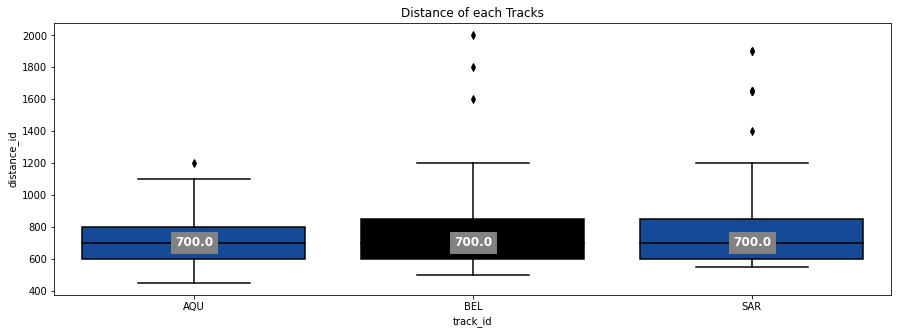

In [21]:
plt.figure(figsize = (15,5))
ax = sns.boxplot(x = 'track_id',y = 'distance_id',data = df2, palette = colors);
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    y = round(lines[4+cat*6].get_ydata()[0],1) 
    ax.text(cat,y,f'{y}',ha='center',va='center',fontweight='semibold',size=12,color='white',bbox=dict(facecolor='#828282', edgecolor='#828282'))    
ax.set_xticklabels(tf2['track_id'].values())
plt.title('Distance of each Tracks');

- All the 3 racetracks have a median distance of **700 - 7 furlongs**. 
- Outliers with values above **1400 - 14 furlongs** can also be found at **BEL(Belmont)** & **SAR(Saratoga)** racetracks.

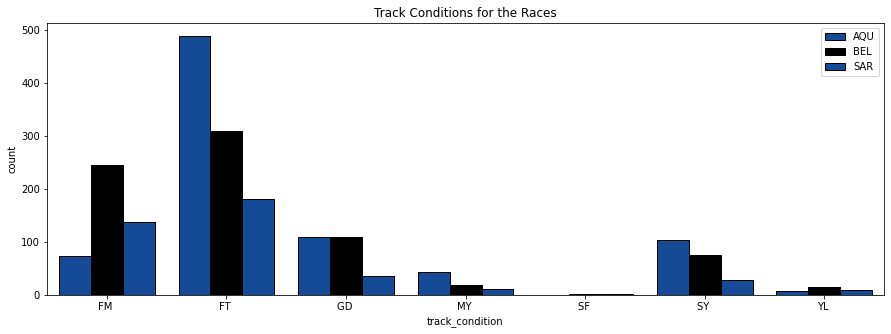

In [22]:
plt.figure(figsize = (15,5))
ax = sns.countplot('track_condition',hue = 'track_id',data = df2,palette = colors, edgecolor = 'black')
ax.set_xticklabels([tf2['track_condition'][i] for i in sorted(df2['track_condition'].unique())])
plt.legend(tf2['track_id'].values())
title = 'Track Conditions for the Races'
plt.title(title);

- All the 3 racetracks have been conditioned to be **FT - Fast** for the most of the races.
- **BEL(Belmont)** racetrack has been made **FM - Firm** for a significant amount of races.
- **SF - Soft** is the least prepared track for the races. 

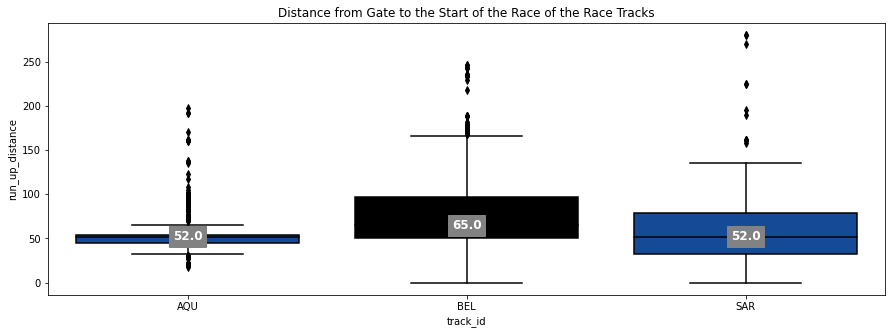

In [23]:
plt.figure(figsize = (15,5))
ax = sns.boxplot(x = 'track_id',y = 'run_up_distance',data = df2, palette = colors);
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    y = round(lines[4+cat*6].get_ydata()[0],1) 
    ax.text(cat,y,f'{y}',ha='center',va='center',fontweight='semibold',size=12,color='white',bbox=dict(facecolor='#828282', edgecolor='#828282'))    
ax.set_xticklabels(tf2['track_id'].values())
plt.title('Distance from Gate to the Start of the Race of the Race Tracks');

- Median **run_up_distance** of **AQU(Aqueduct)** & **SAR(Saratoga)** are same i.e **52 ft**!
- **BEL(Belmont)'s** **run_up_distance** is higher than the other 2 racetracks with **65ft**!
- The highest **run_up_distance** value including the outliers is found at **SAR(Saratoga)** racetrack with more than **250 ft**.

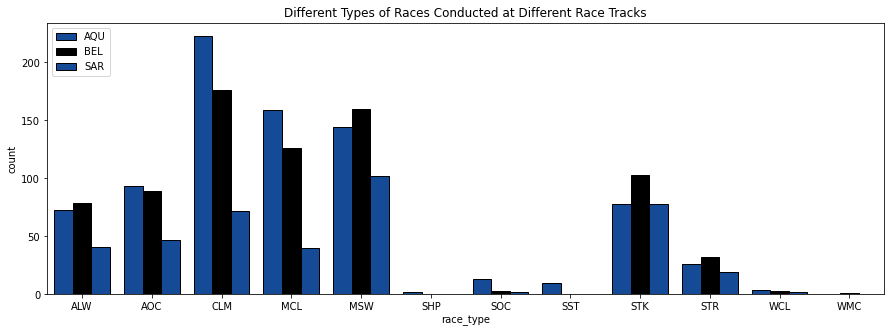

In [24]:
plt.figure(figsize = (15,5))
ax = sns.countplot('race_type',hue = 'track_id',data = df2,palette = colors, edgecolor = 'black')
ax.set_xticklabels([tf2['race_type'][i] for i in sorted(df2['race_type'].unique())])
plt.legend(tf2['track_id'].values())
title = 'Different Types of Races Conducted at Different Race Tracks'
plt.title(title);

- All the 3 racetracks conducted a host of the following types of races :
    - **ALW - Allowance**
    - **AOC - Allowance Optional Claimer**
    - **CLM - Claiming**
    - **MCL - Maiden Claiming**
    - **MSW - Maiden Special Weight**
    - **STK - Stakes**

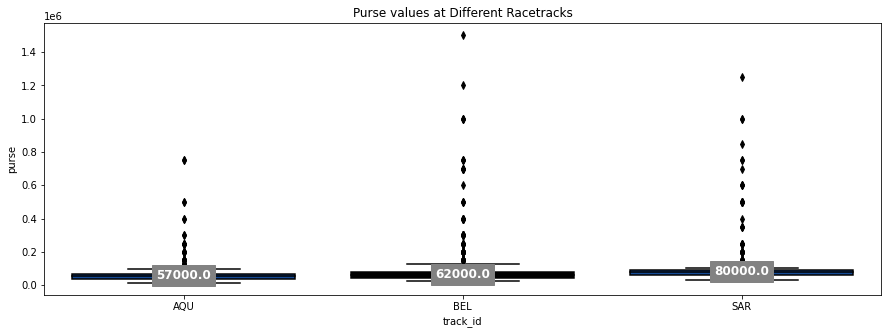

In [25]:
plt.figure(figsize = (15,5))
ax = sns.boxplot(x = 'track_id',y = 'purse',data = df2, palette = colors);
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    y = round(lines[4+cat*6].get_ydata()[0],1) 
    ax.text(cat,y,f'{y}',ha='center',va='center',fontweight='semibold',size=12,color='white',bbox=dict(facecolor='#828282', edgecolor='#828282'))    
ax.set_xticklabels(tf2['track_id'].values())
plt.title('Purse values at Different Racetracks');

- **BEL(Belmont)** racetrack's highest outlier **purse** value is more than **1400000**.
- Despite conducting low number of races at **SAR(Saratoga)** racetrack, it's median **purse** value of **80000** is more than the other 2 racetracks.

# <center><div style="font-family: Trebuchet MS; background-color: #0047AB; color: #000000; padding: 12px; line-height: 1;">Analysis of Different Races & Horse Performances</div></center>

- **We now aim to find insights about the varied races, performances of horses in those races!**

In [26]:
pt = []
for i in df2['post_time']:
    i = str(i.time())
    pt.append((i[0:2],i[3:5]))
hrs = [ i[0] + ':30 - ' +str(int(i[0]) + 1) if int(i[1]) > 30 else i[0] + ' - ' + i[0] + ':30' for i in pt]
df2['Hours'] = hrs

- First step, we create a new column named **Hours** and store it's values in string datatype! Let's visualize and check if we can find anything interesting about the **race_number** and time!  

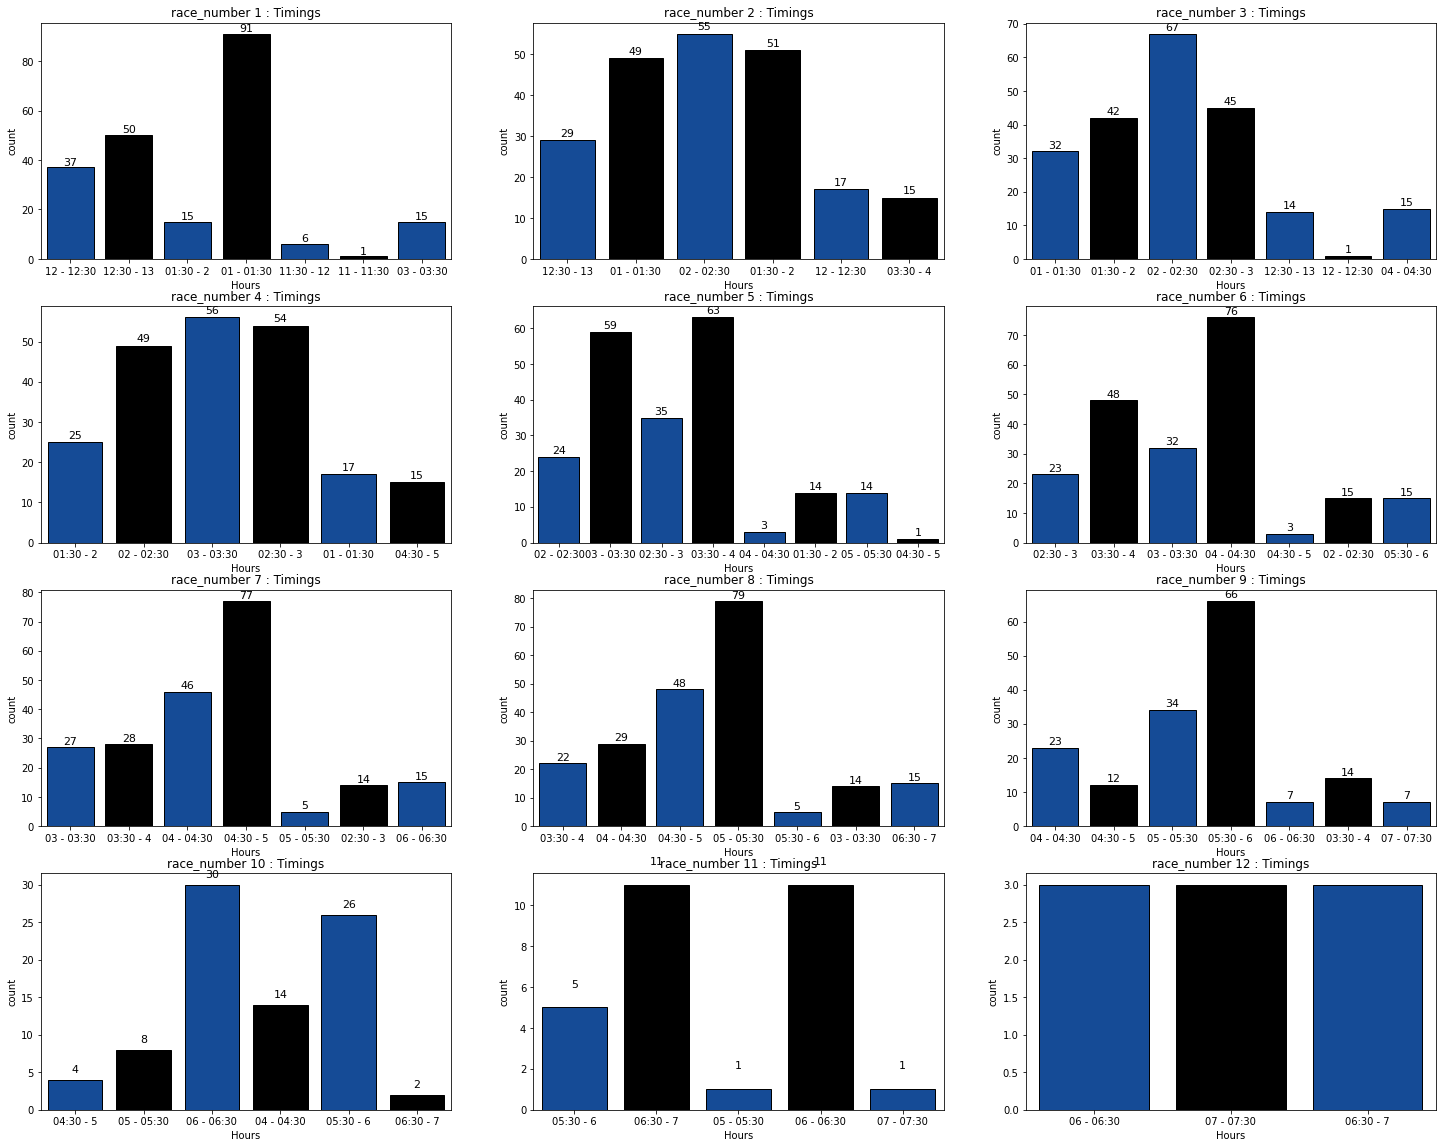

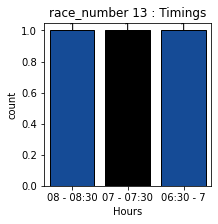

In [27]:
fig = plt.subplots(nrows = 4,ncols = 3,figsize = (25,20))
for i in range(1,13):
    plt.subplot(4,3,i)
    ax = sns.countplot('Hours', data = df2[df2['race_number'] == i], palette = colors,edgecolor = 'black');
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 1, rect.get_height(), horizontalalignment='center', fontsize = 11)
    plt.title('race_number ' + str(i) + ' : Timings');

fig = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3))
plt.subplot(1,1,1)
ax = sns.countplot('Hours', data = df2[df2['race_number'] == 13], palette = colors,edgecolor = 'black');
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.title('race_number ' + str(13) + ' : Timings');

- **race_number 1** has the earliest timing of conducting races between **11 - 11:30** & **race_number 13** conducted the most late race between **8 - 8:30**.
- All of the **race_number** have a dominant time period where the most number of races have been conducted.
- These **race_number** values probably signify the order of the races that are conducted during the day. This can be a strong indicator to identify the **race_number**.
- We will also try to find it's significance with the **race_type** & **course_type** as well!

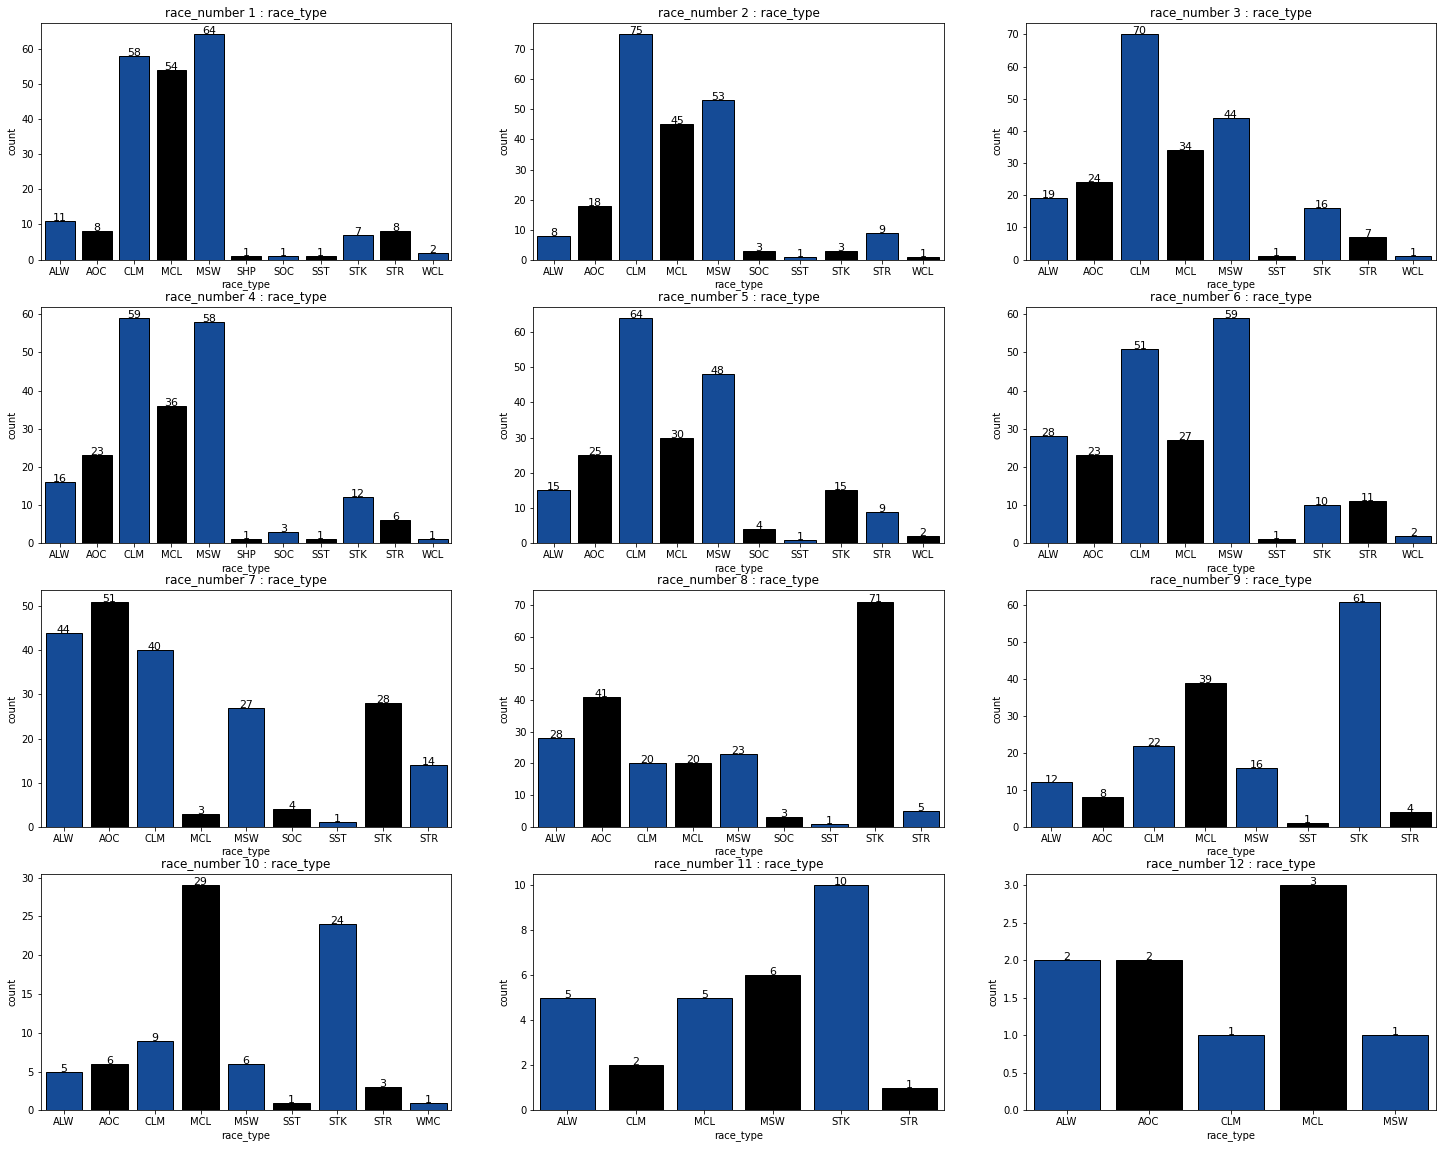

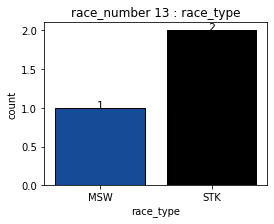

In [28]:
fig = plt.subplots(nrows = 4,ncols = 3,figsize = (25,20))
for i in range(1,13):
    plt.subplot(4,3,i)
    ax = sns.countplot('race_type', data = df2[df2['race_number'] == i], palette = colors,edgecolor = 'black');
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
    ax.set_xticklabels([tf2['race_type'][j] for j in sorted(df2[df2['race_number'] == i]['race_type'].unique())])
    plt.title('race_number ' + str(i) + ' : race_type');

fig = plt.subplots(nrows = 1,ncols = 1,figsize = (4,3))
plt.subplot(1,1,1)
ax = sns.countplot('race_type', data = df2[df2['race_number'] == 13], palette = colors,edgecolor = 'black');
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels([tf2['race_type'][i] for i in sorted(df2[df2['race_number'] == 13]['race_type'].unique())])
plt.title('race_number ' + str(13) + ' : race_type');

- From the above visualization, **CLM - Claiming** &  **MSW - Maiden Special Weight** types of races are found in near about all the **race_number**. 
- We can also see the reason behind the drop of the number of races from **race_number 9 - 13**. From these **race_number**, we can also see the number of **STK - Stake** races increase.  
- **race_types** drops for the **race_number 9 - 13** probably because the **day is about to end**.

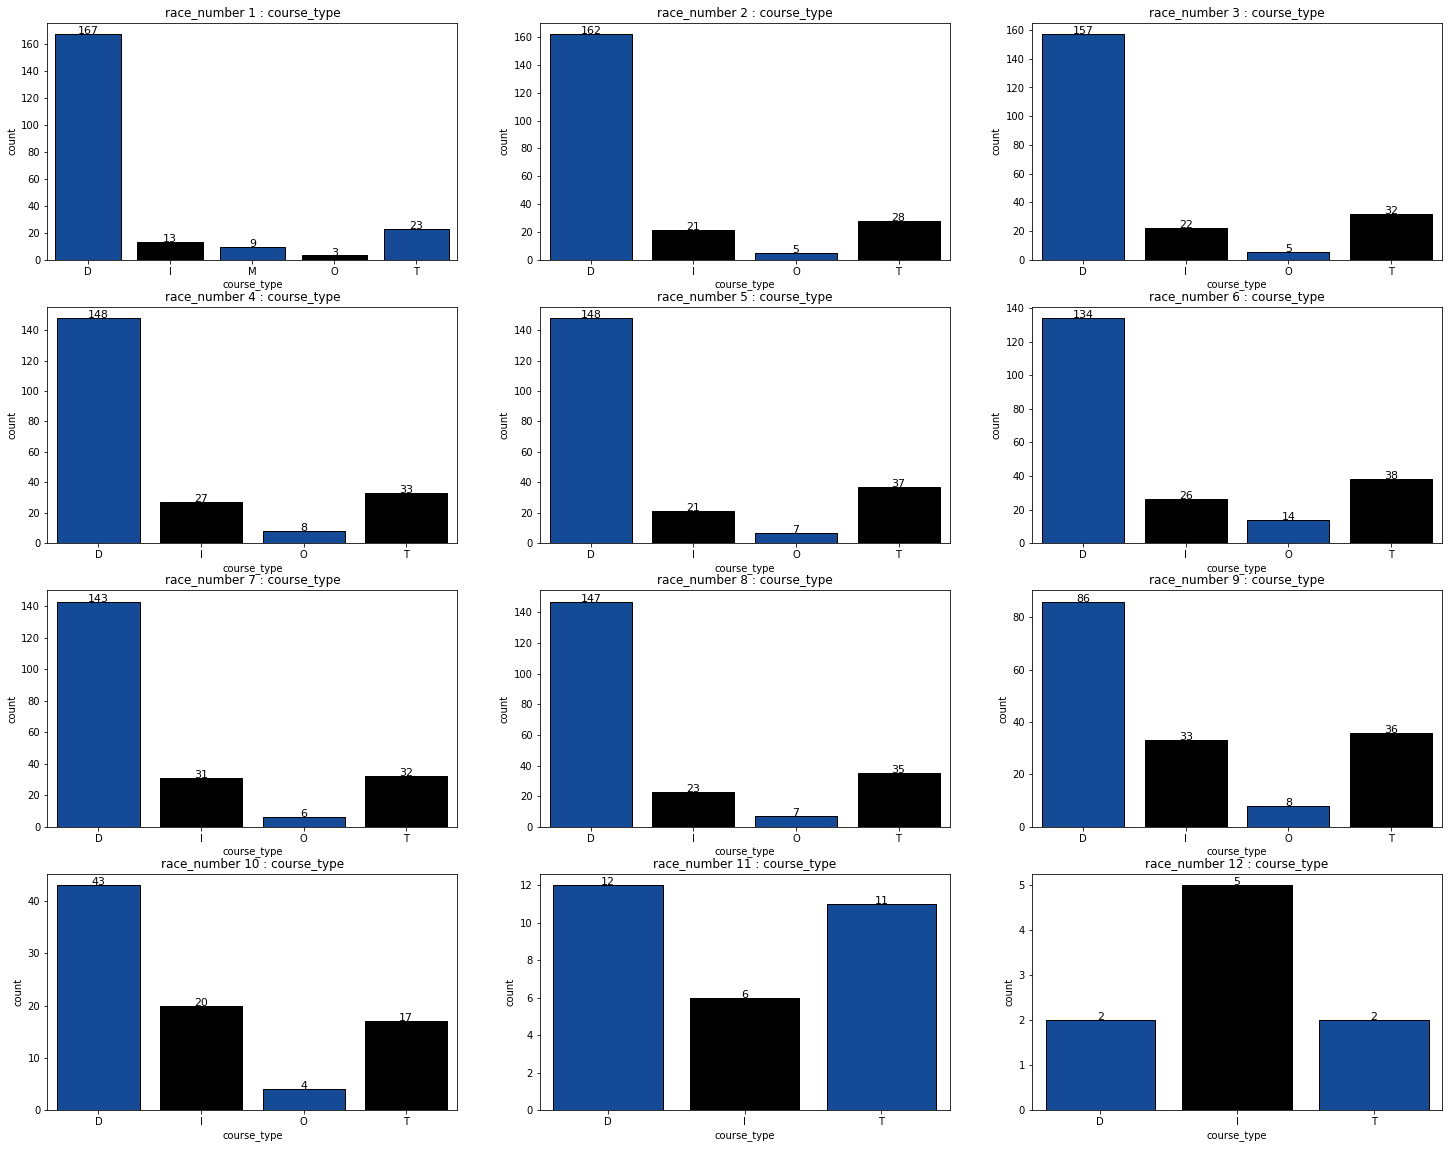

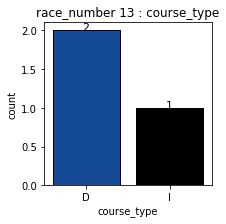

In [31]:
fig = plt.subplots(nrows = 4,ncols = 3,figsize = (25,20))
for i in range(1,13):
    plt.subplot(4,3,i)
    ax = sns.countplot('course_type', data = df2[df2['race_number'] == i], palette = colors,edgecolor = 'black');
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
    ax.set_xticklabels([tf2['course_type'][j] for j in sorted(df2[df2['race_number'] == i]['course_type'].unique())])
    plt.title('race_number ' + str(i) + ' : course_type');

fig = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3))
plt.subplot(1,1,1)
ax = sns.countplot('course_type', data = df2[df2['race_number'] == 13], palette = colors,edgecolor = 'black');
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels([tf2['course_type'][i] for i in sorted(df2[df2['race_number'] == 13]['course_type'].unique())])
plt.title('race_number ' + str(13) + ' : course_type');

- This visualization is similar to **race_type**! All the **race_number** races have **D - Dirt** courses and alot of races are conducted on it!
- Just like **race_type**, **course_type** gets reduced for the **race_number 9 - 13** & narrows down to **2 course_types** only.

**All of these visualizations explain the drop off in number of races from race_number 9 - 13!**

**Thus, managing the energies of the horses for races on different tracks for multiple courses during the varied time slots is key!**

**We will now move our attention towards the perfomances of the horses in these races!**

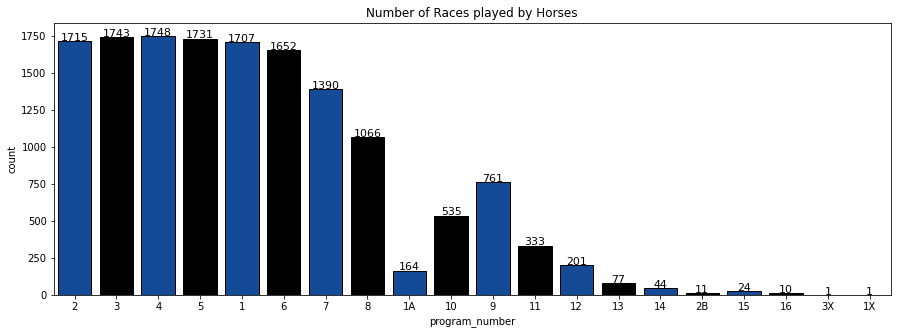

In [32]:
plt.figure(figsize = (15,5))
ax = sns.countplot('program_number',data = df3,palette = colors, edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.title('Number of Races played by Horses');

- A clear cut difference in the endurance of the horses can be observed from the number of races played by each horse!

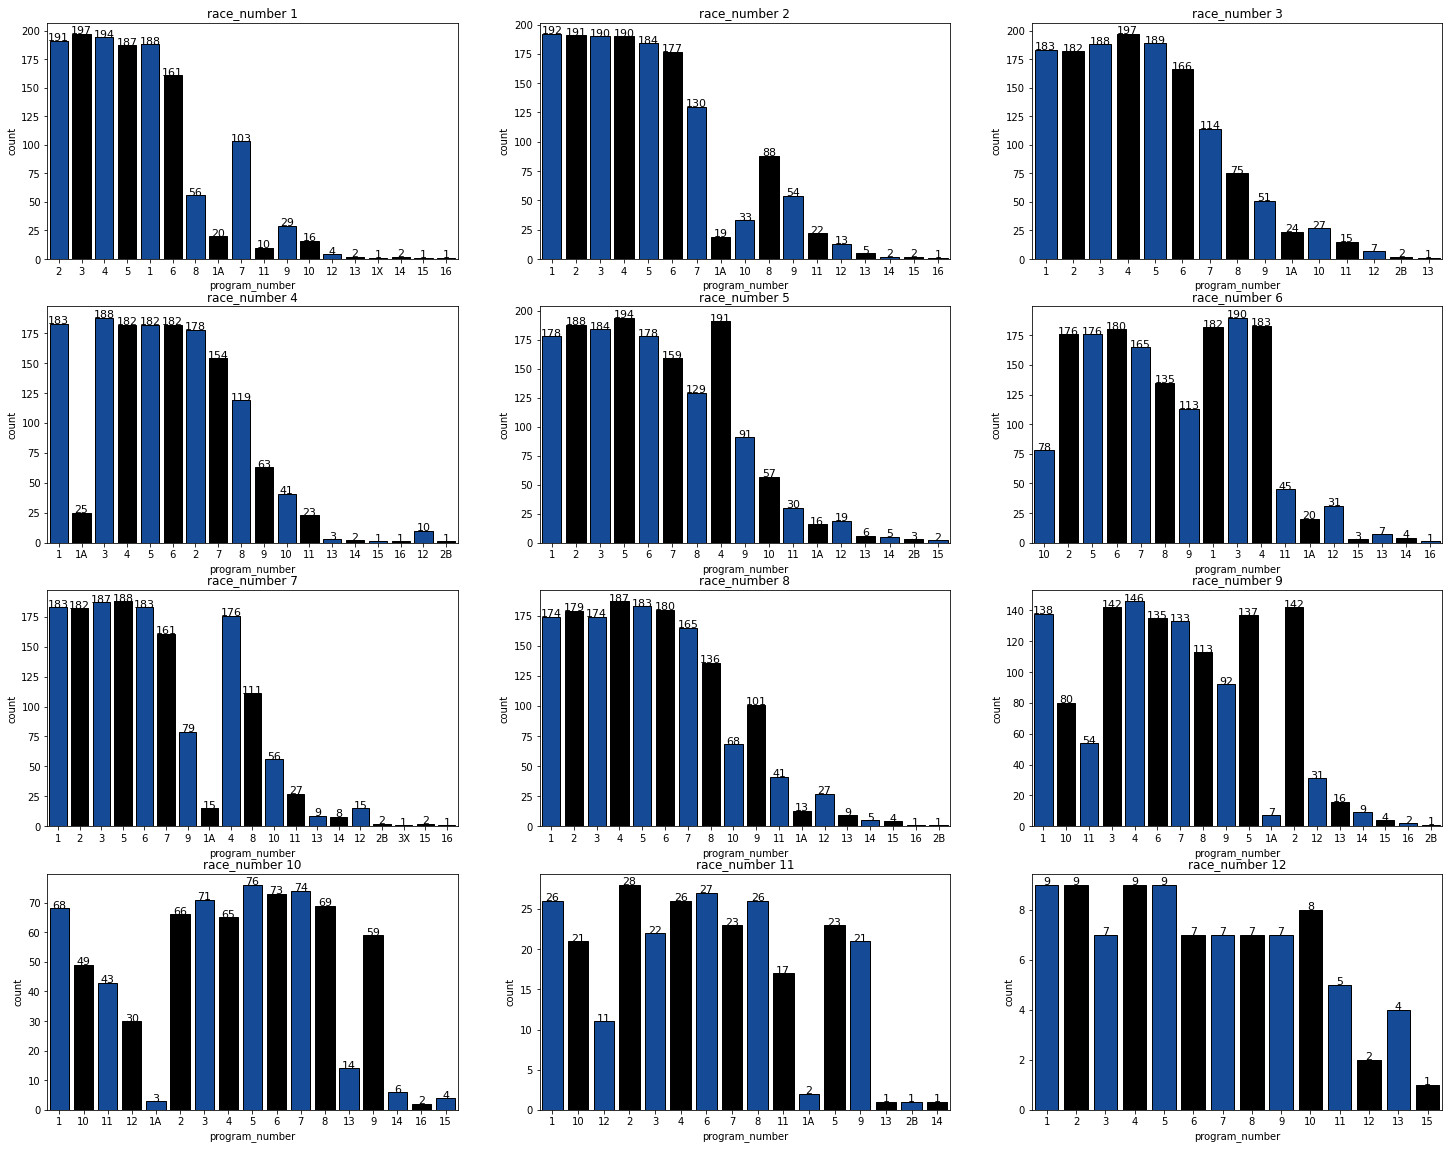

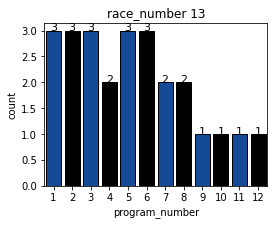

In [33]:
fig = plt.subplots(nrows = 4,ncols = 3,figsize = (25,20))
for i in range(1,13):
    plt.subplot(4,3,i)
    ax = sns.countplot('program_number', data = df3[df3['race_number'] == i], palette = colors,edgecolor = 'black');
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
    plt.title('race_number '+ str(i));

fig = plt.subplots(nrows = 1,ncols = 1,figsize = (4,3))
plt.subplot(1,1,1)
ax = sns.countplot('program_number', data = df3[df3['race_number'] == 13], palette = colors,edgecolor = 'black');
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.title('race_number ' + str(13));

- Horses with **program_number : 1, 2, 3, 4, 5, 6** are playing heavily in all the **race_number**. 
- From the above visualizations, we can say that these horses are very well maintained and conditioned for adapting to different types of turfs. 
- They are not fazed by the **track_conditions** or **course_type** presented to them from these **race_number**. They display their solid endurance by playing races throughout the day!

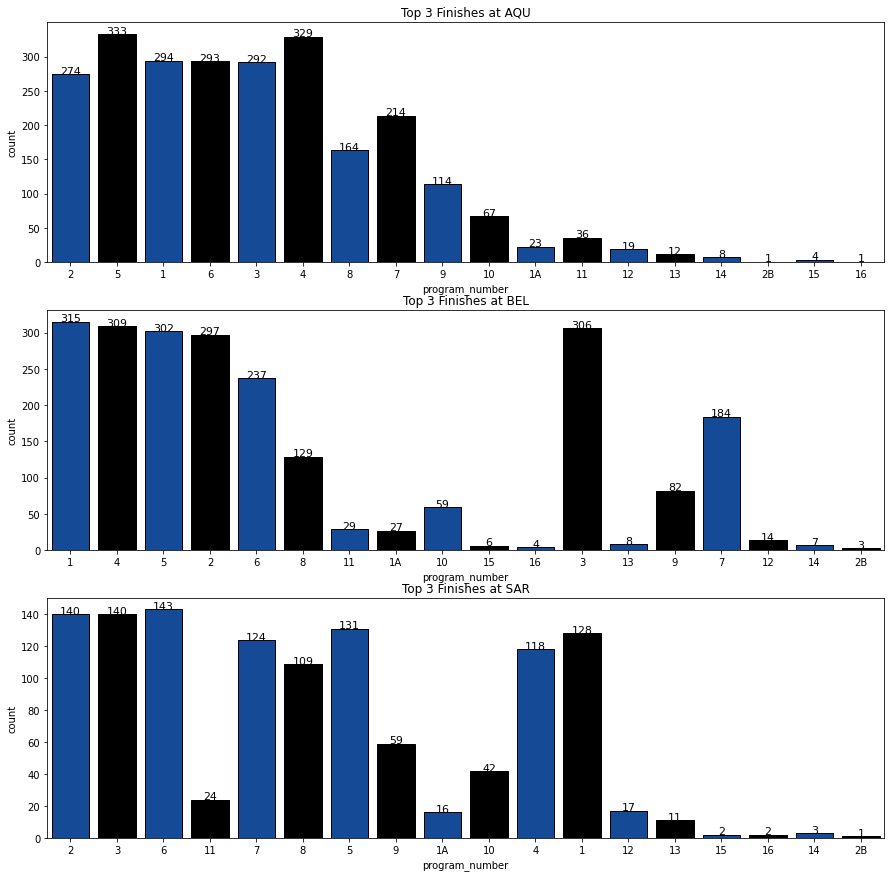

In [34]:
fig = plt.subplots(nrows = 3,ncols = 1,figsize = (15,15))
for i in range(3):
    plt.subplot(3,1,i+1)
    ax = sns.countplot('program_number', data = df3[(df3['position_at_finish'] <= 3) & (df3['track_id'] == i)], palette = colors,edgecolor = 'black');
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
    plt.title('Top 3 Finishes at '+ tf3['track_id'][i]);

- Horses with **program_number : 1, 2, 3, 4, 5, 6** dominate the top 3 finishes on all the 3 tracks.
- Clearly, these 6 horses can be classed as elite.
- We will check the odds against these horses!

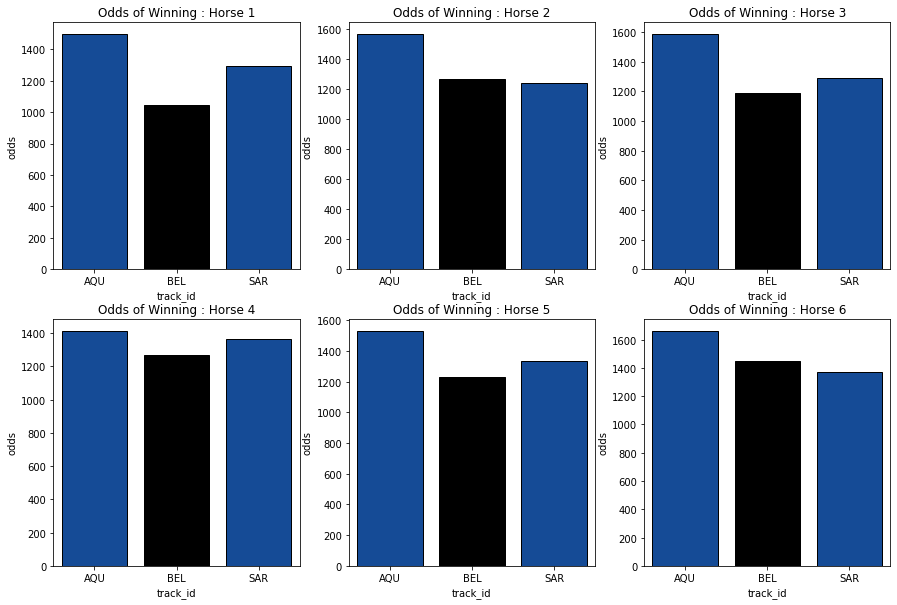

In [35]:
fig = plt.subplots(nrows = 2, ncols = 3, figsize = (15,10))
for i in range(1,7):
    plt.subplot(2,3,i)
    ax = sns.barplot('track_id','odds',data = df3[(df3['program_number'] == i)],palette = colors, edgecolor = 'black',ci = None)               
    ax.set_xticklabels(tf3['track_id'].values())
    plt.title('Odds of Winning : Horse ' + str(i));

- **Horse 6** has the highest odds of winning the races at **AQU(Aqueduct)** as well as **BEL(Belmont)** racetrack. People back this horse to win alot!
- All of the horses have the highest odds of winning races at **AQU(Aqueduct)** racetrack.
- We now check their success rate in races where we define the success rate as the finishing in the top 3!

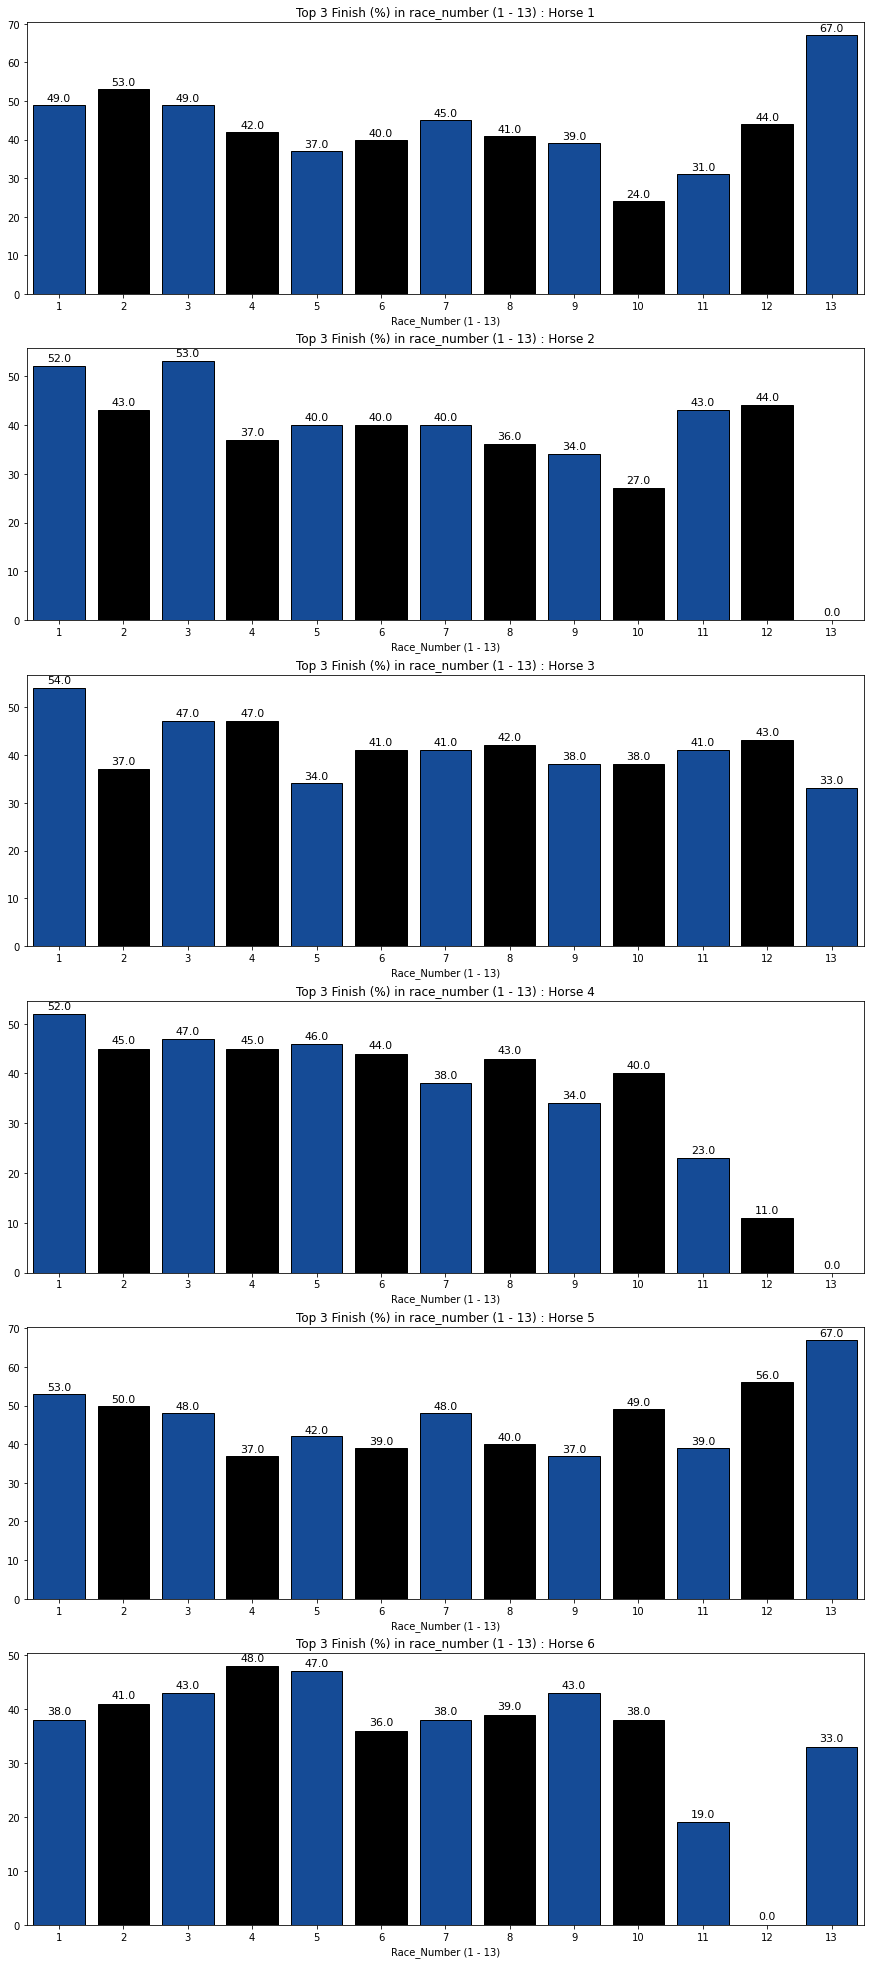

In [36]:
sr1 = [round(len(df3[(df3['program_number'] == 1) & (df3['position_at_finish'] <= 3) & (df3['race_number'] == i)]) / len(df3[(df3['program_number'] == 1) & (df3['race_number'] == i)]) * 100) for i in range(1,14)]
sr2 = [round(len(df3[(df3['program_number'] == 2) & (df3['position_at_finish'] <= 3) & (df3['race_number'] == i)]) / len(df3[(df3['program_number'] == 2) & (df3['race_number'] == i)]) * 100) for i in range(1,14)]
sr3 = [round(len(df3[(df3['program_number'] == 3) & (df3['position_at_finish'] <= 3) & (df3['race_number'] == i)]) / len(df3[(df3['program_number'] == 3) & (df3['race_number'] == i)]) * 100) for i in range(1,14)]
sr4 = [round(len(df3[(df3['program_number'] == 4) & (df3['position_at_finish'] <= 3) & (df3['race_number'] == i)]) / len(df3[(df3['program_number'] == 4) & (df3['race_number'] == i)]) * 100) for i in range(1,14)]
sr5 = [round(len(df3[(df3['program_number'] == 5) & (df3['position_at_finish'] <= 3) & (df3['race_number'] == i)]) / len(df3[(df3['program_number'] == 5) & (df3['race_number'] == i)]) * 100) for i in range(1,14)]
sr6 = [round(len(df3[(df3['program_number'] == 6) & (df3['position_at_finish'] <= 3) & (df3['race_number'] == i)]) / len(df3[(df3['program_number'] == 6) & (df3['race_number'] == i)]) * 100) for i in range(1,14)]

sr = [sr1, sr2, sr3, sr4, sr5, sr6]

fig = plt.subplots(nrows = 6, ncols = 1, figsize = (15,35))
for i in range(len(sr)):
    plt.subplot(6,1,i+1)
    ax = sns.barplot(df3['race_number'].unique(),sr[i], palette = colors, edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 1, rect.get_height(), horizontalalignment='center', fontsize = 11)
    plt.xlabel('Race_Number (1 - 13)')
    plt.title('Top 3 Finish (%) in race_number (1 - 13) : Horse ' + str(i+1))

- From all of these graphs, we can see many trends!
- **Horse 5** seems to have a stable performance over all the **race_number 1 - 13**. This highlights it's adaptability to the various courses as well as adjusting to the time slots of these races.
- **Horse 3** and **Horse 1** can be considered to be the 2nd & 3rd pick after **Horse 5**. Their performances are formidable as well!
- **Horse 2** and **Horse 4** display a declining performance as the day comes to an end!
- **Horse 6** displays promising signs during the early times of the day but eventually falters in performance.

# <center><div style="font-family: Trebuchet MS; background-color: #0047AB; color: #000000; padding: 12px; line-height: 1;">Horse Identification : Marathoner or Sprinter</div></center>

- **We aim to find if the horse is a marathoner or spinner!**
- Identifying the characteristics of the horse is crucial.

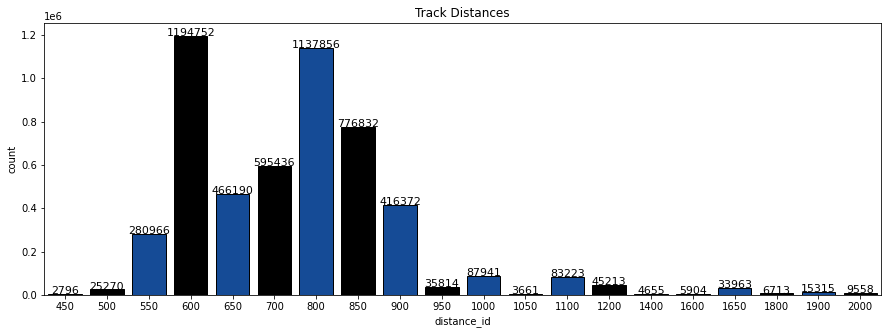

In [37]:
plt.figure(figsize = (15,5))
ax = sns.countplot(df1['distance_id'], palette = colors,edgecolor = 'black');
for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.5, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.title('Track Distances');

- We will consider the races with distances more than **1800** as **marathons**.
- Races with distances less than **1800** will be considered as **sprints**.
- From the above graph, we can say that there are more **sprints** than **marathons**.

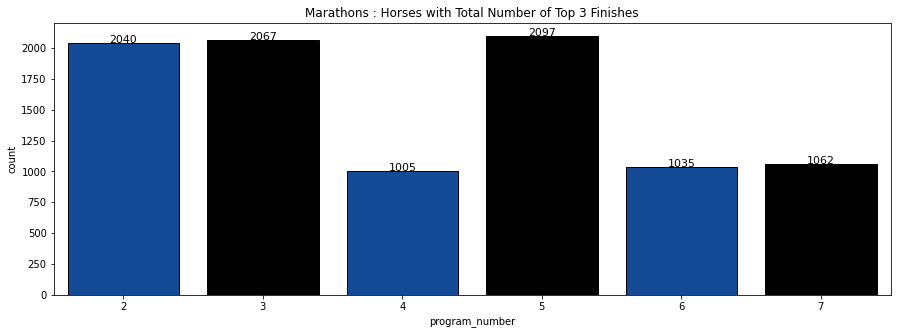

In [38]:
plt.figure(figsize = (15,5))
ax = sns.countplot('program_number', data = df1[(df1['distance_id'] > 1800) & (df1['position_at_finish'] <= 3)], palette = colors,edgecolor = 'black');
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.title('Marathons : Horses with Total Number of Top 3 Finishes');

- **Horse 3** & **Horse 5** are solid marathoners.
- **Horse 2** is also a formidable marathoner.
- Outside of the **Horse 1 - 8**, other horses need to be train more! 

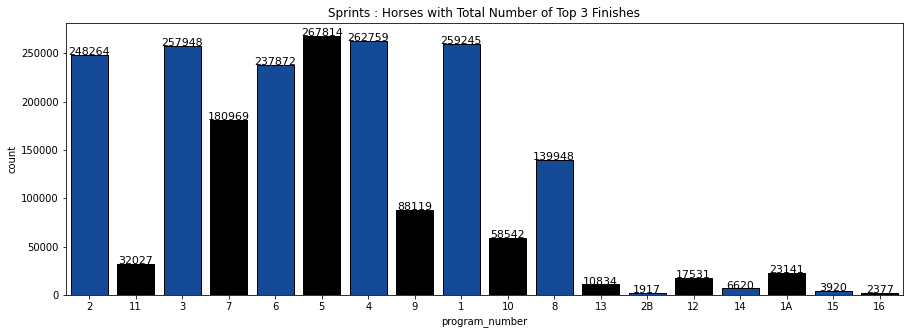

In [39]:
plt.figure(figsize = (15,5))
ax = sns.countplot('program_number', data = df1[(df1['distance_id'] <= 1800) & (df1['position_at_finish'] <= 3)], palette = colors,edgecolor = 'black');
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.title('Sprints : Horses with Total Number of Top 3 Finishes');

- **Horse 1 - 6** are solid sprinters. 
- Except **Horse 1X** and **Horse 3X**, all the horses have scored a top 3 finish.
- Clearly, horses are trained more for **Sprint** races than **Marathon**. 
- We will just check the **purse** value to check if money is the motivation behind jockeys training their horses to be more equipped for sprinters than being marathoners.

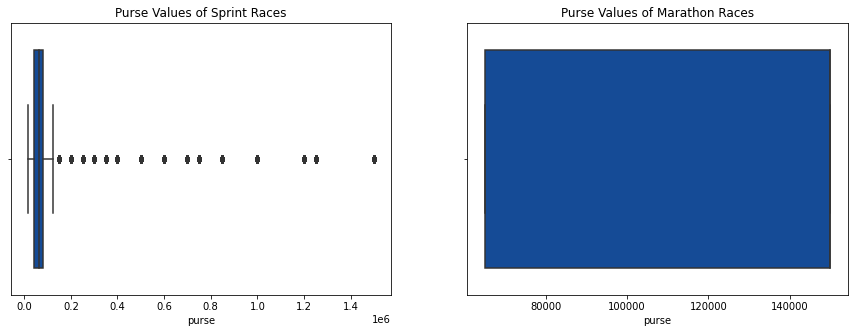

In [40]:
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
df = [df1[(df1['distance_id'] <= 1800)], df1[(df1['distance_id'] > 1800)]]
f1 = ['Purse Values of Sprint Races', 'Purse Values of Marathon Races']
for i in range(len(df)):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = 'purse', data = df[i], palette = colors, orient = 'v')
    plt.title(f1[i])

- This proves that money is a huge motivation!
- The highest **purse** value of **Sprint** races is more than **1400000** whereas the highest **purse** value of **Marathon** races is more than **140000**.
- Overall, **Horse 1 - 6** have pretty much equipped themselves to be competent enough for both formats!

### References & Resources :

- https://www.science.org/content/article/best-way-win-horse-race-mathematicians-may-have-answer
- https://practicalpunting.com.au/pp-online/a-z-of-betting/form-analysis/jockeystrainers/the-secret-tactics-19861104
- https://www.quora.com/What-are-the-key-strategies-or-major-considerations-that-jockeys-utilize-to-win-horse-races
- https://sharkcoder.com/data-visualization/seaborn-boxplot

# <center><div style="font-family: Trebuchet MS; background-color: #0047AB; color: #000000; padding: 12px; line-height: 1;">Please upvote if you like the work!</div><div style="font-family: Trebuchet MS; background-color: #0047AB; color: #000000; padding: 12px; line-height: 1;">Any sort of feedback is appreciated!</div><div style="font-family: Trebuchet MS; background-color: #0047AB; color: #000000; padding: 12px; line-height: 1;">Thank you!</div></center>